In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('AmesHousing.csv', sep='\t')
pd.set_option('display.max_columns', None)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [4]:
print(df.to_string())

      Order         PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Pool QC  Fence Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type Sale Condition  SalePric

In [5]:
for i in df.columns:
    print(i," has " ,df[i].nunique(), " unique values")



Order  has  2930  unique values
PID  has  2930  unique values
MS SubClass  has  16  unique values
MS Zoning  has  7  unique values
Lot Frontage  has  128  unique values
Lot Area  has  1960  unique values
Street  has  2  unique values
Alley  has  2  unique values
Lot Shape  has  4  unique values
Land Contour  has  4  unique values
Utilities  has  3  unique values
Lot Config  has  5  unique values
Land Slope  has  3  unique values
Neighborhood  has  28  unique values
Condition 1  has  9  unique values
Condition 2  has  8  unique values
Bldg Type  has  5  unique values
House Style  has  8  unique values
Overall Qual  has  10  unique values
Overall Cond  has  9  unique values
Year Built  has  118  unique values
Year Remod/Add  has  61  unique values
Roof Style  has  6  unique values
Roof Matl  has  8  unique values
Exterior 1st  has  16  unique values
Exterior 2nd  has  17  unique values
Mas Vnr Type  has  4  unique values
Mas Vnr Area  has  445  unique values
Exter Qual  has  4  unique va

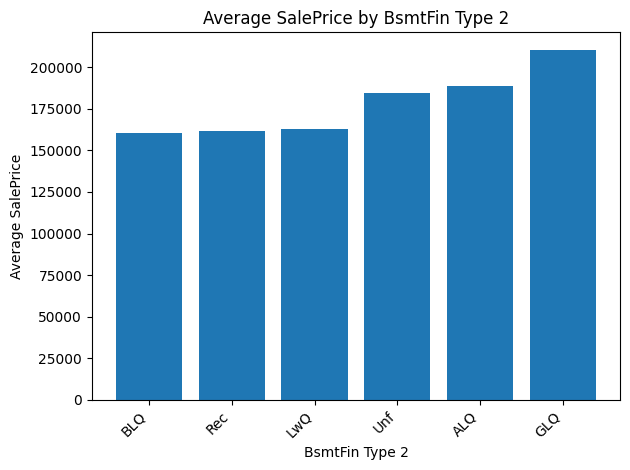

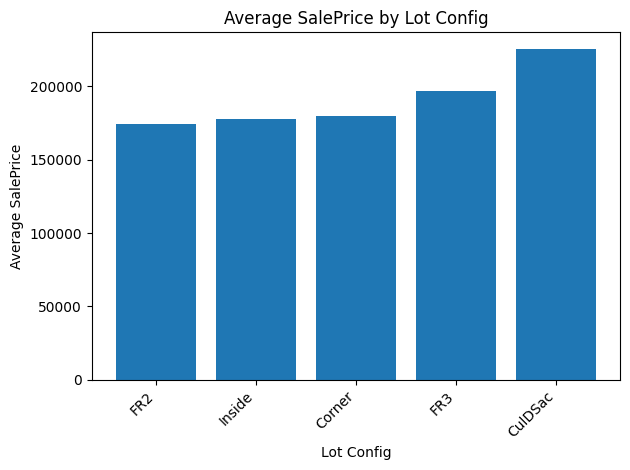

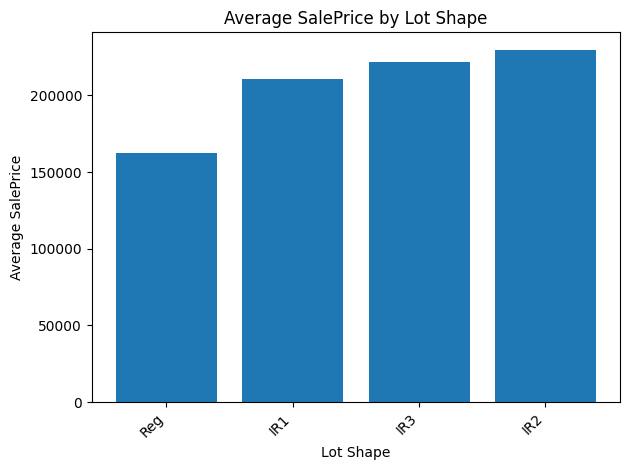

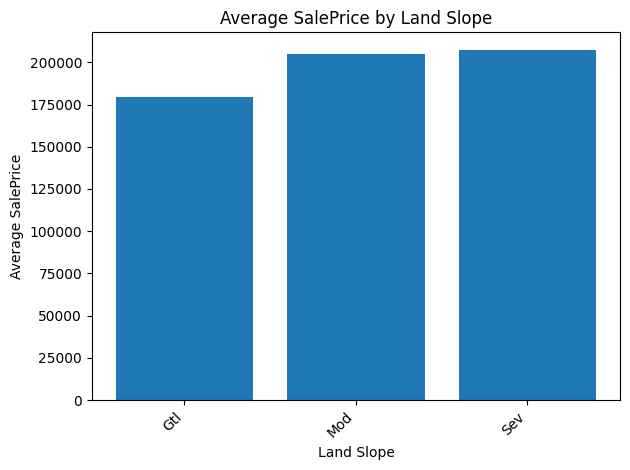

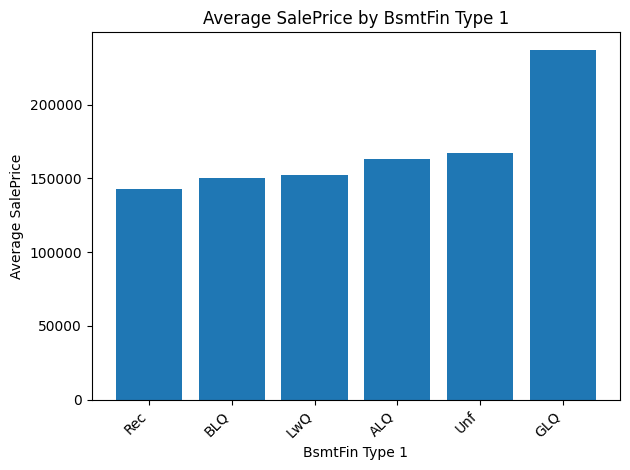

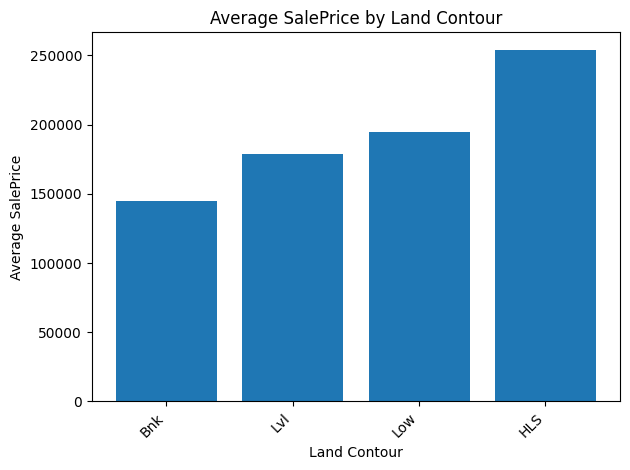

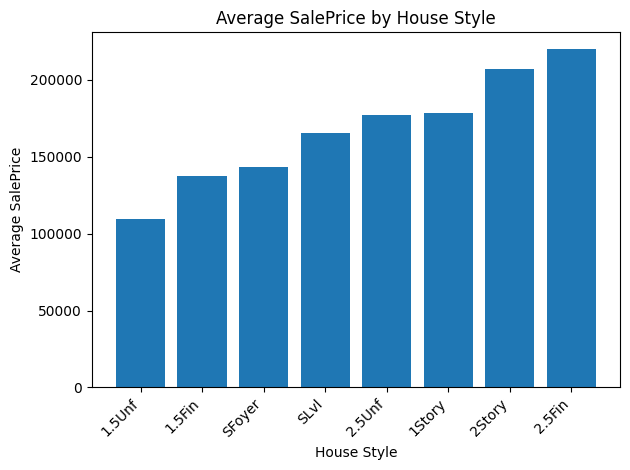

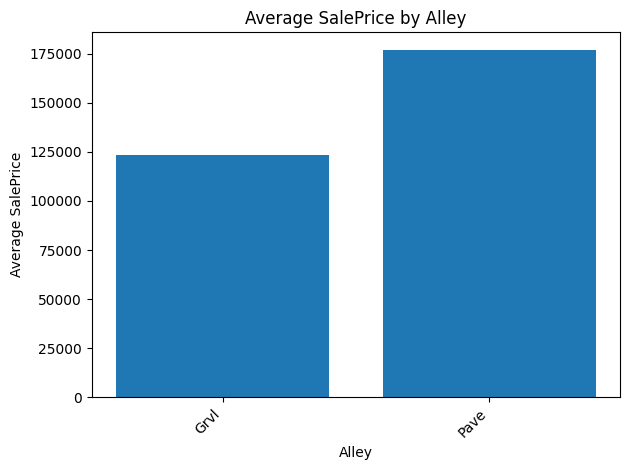

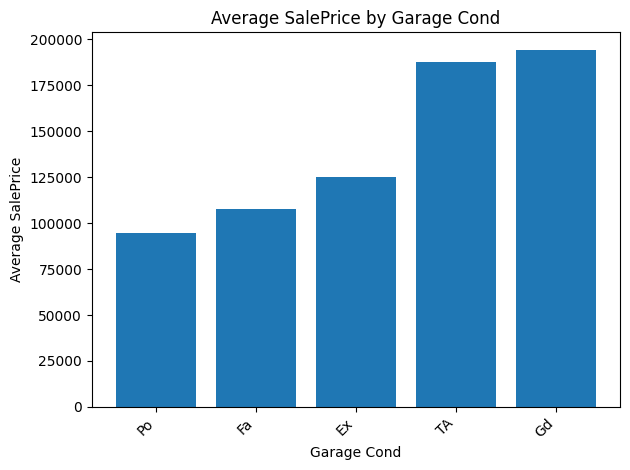

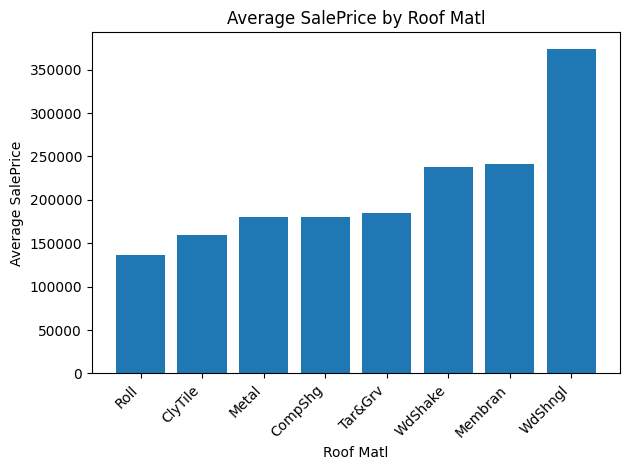

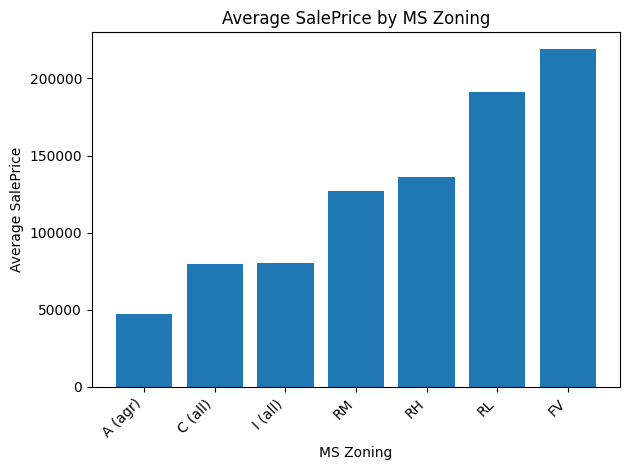

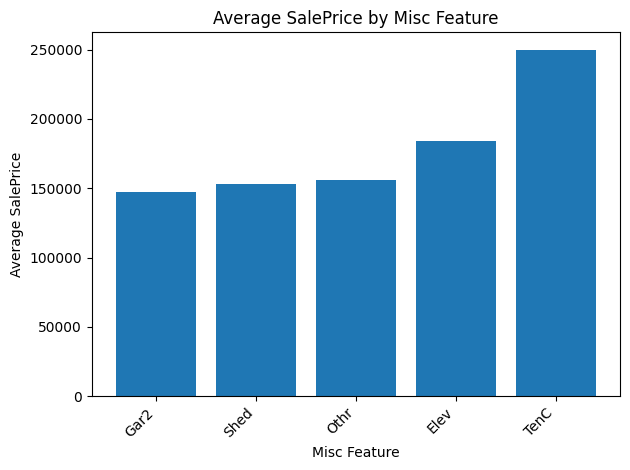

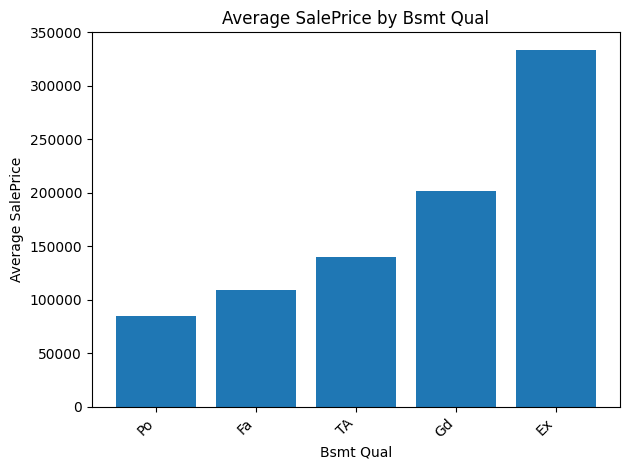

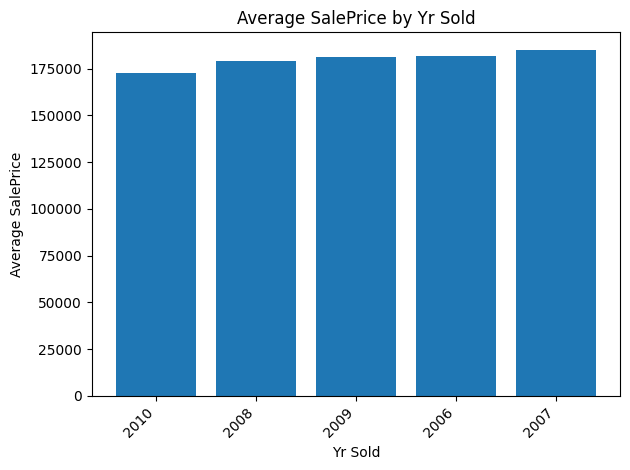

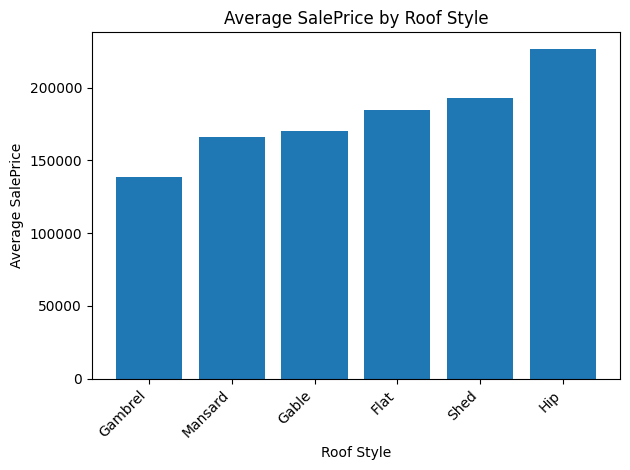

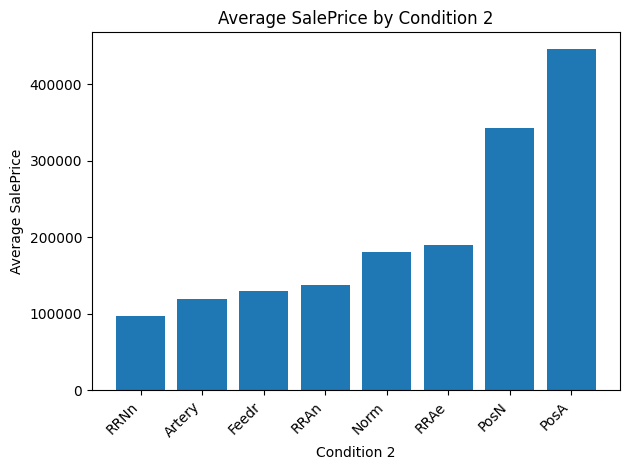

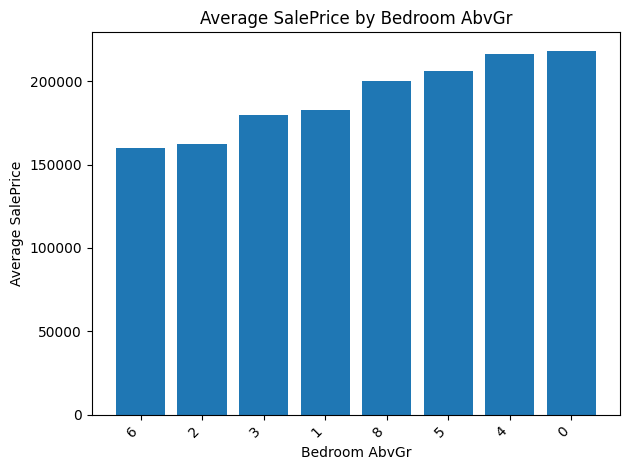

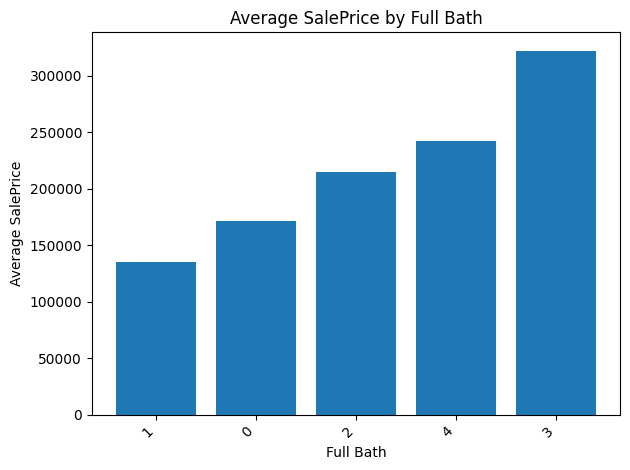

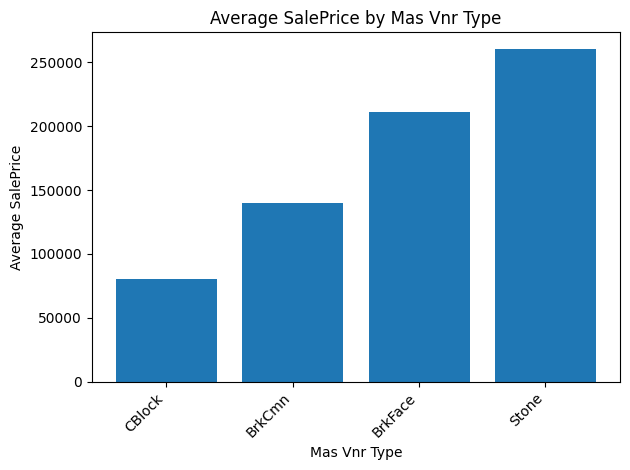

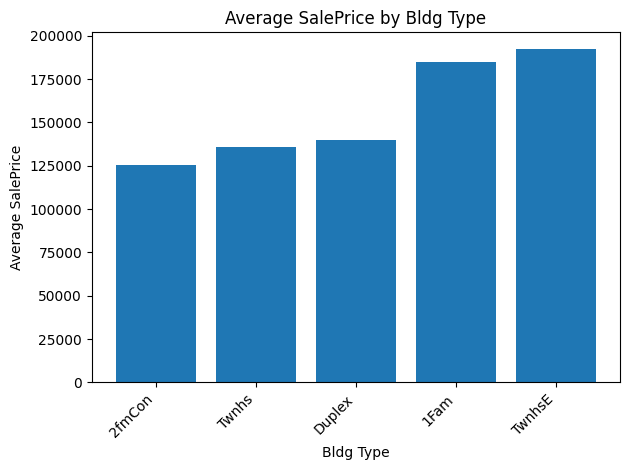

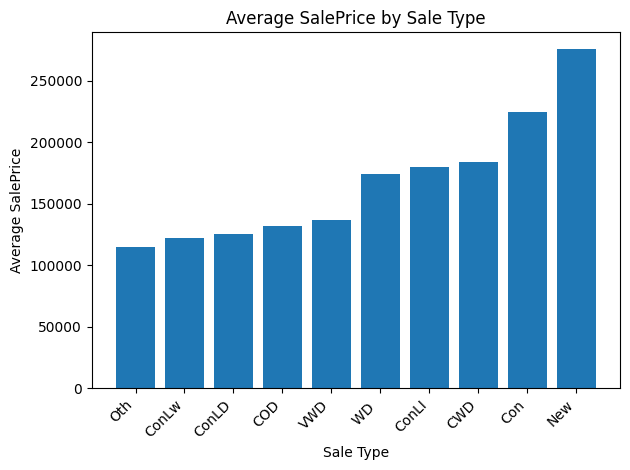

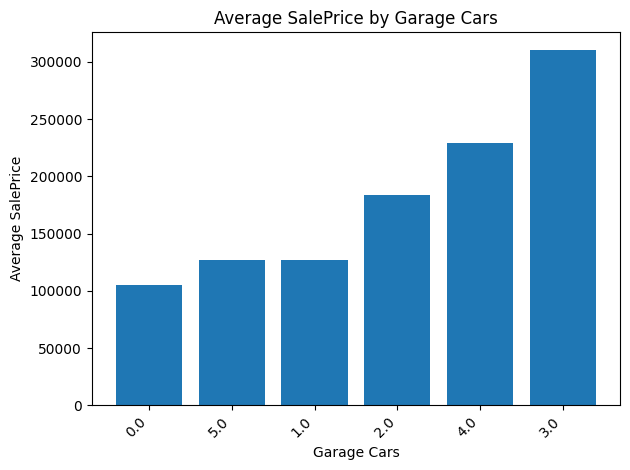

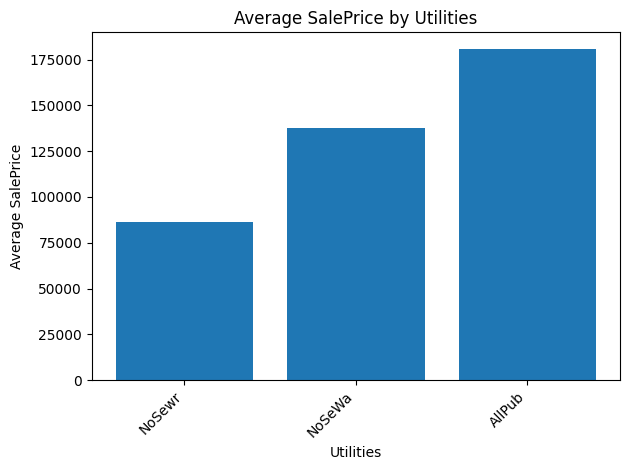

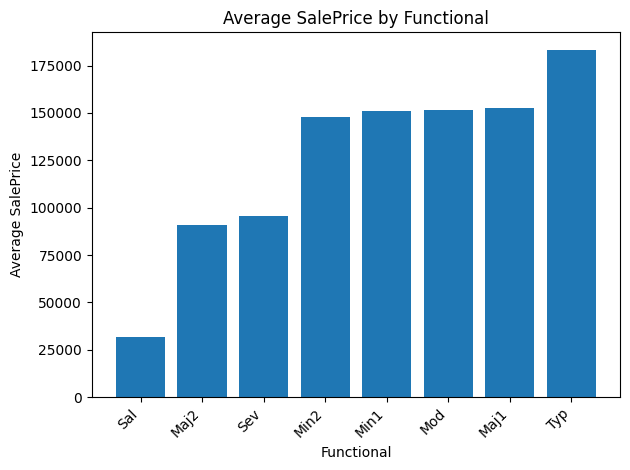

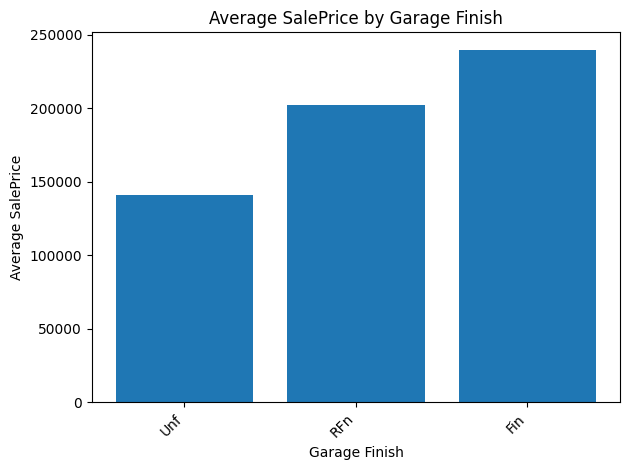

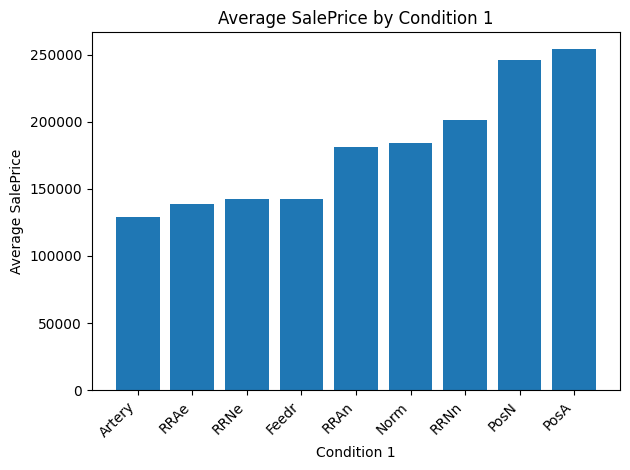

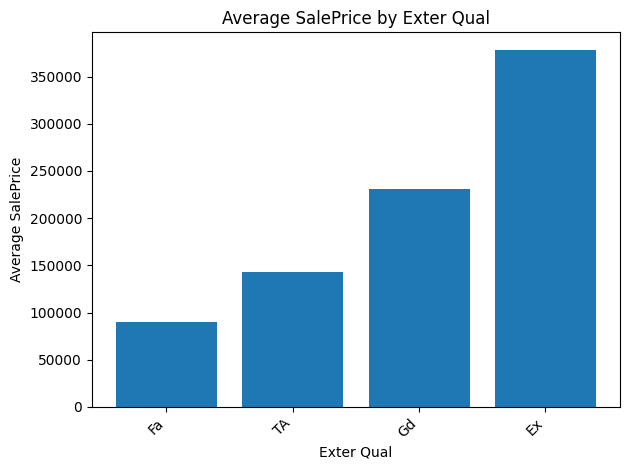

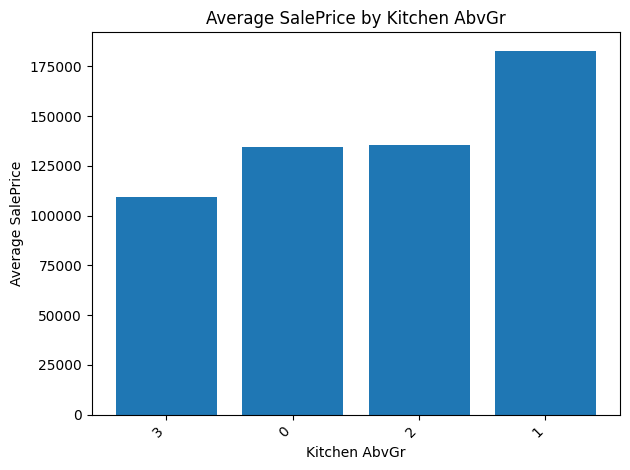

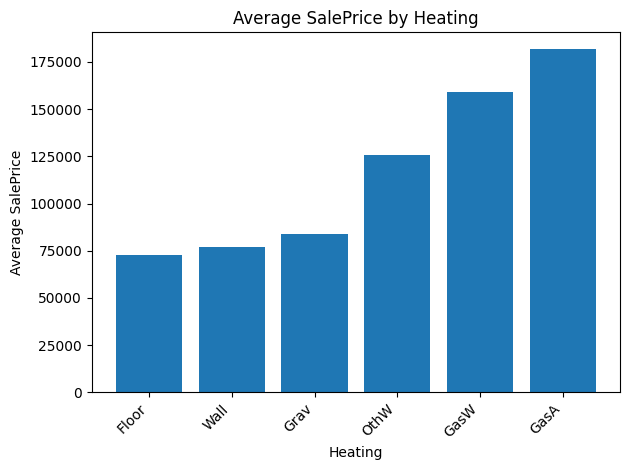

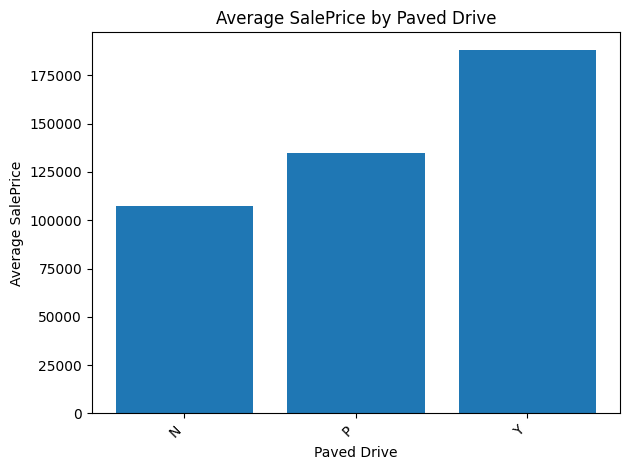

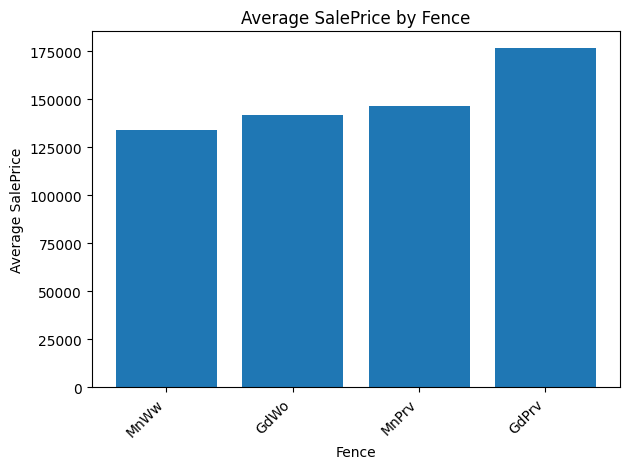

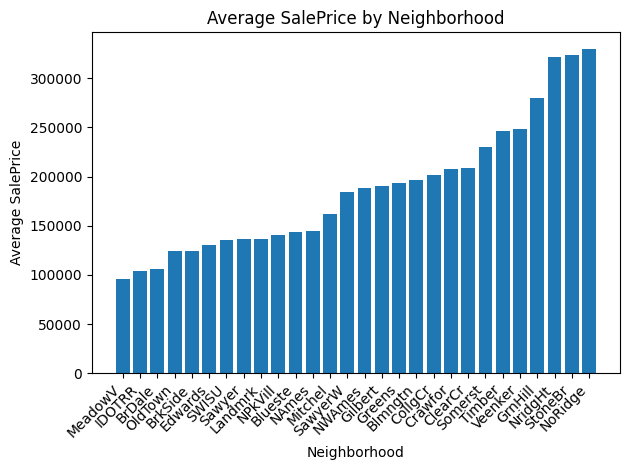

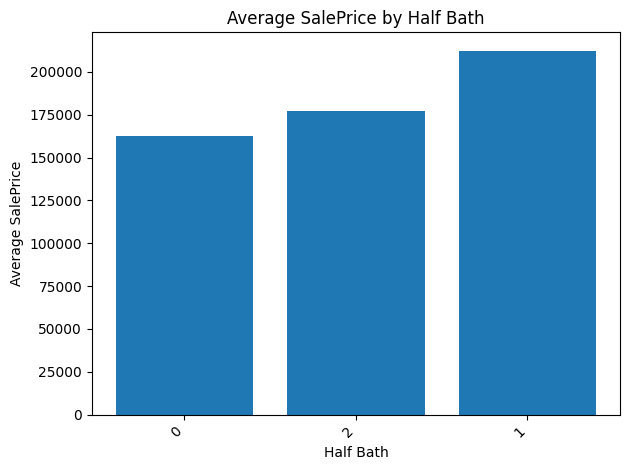

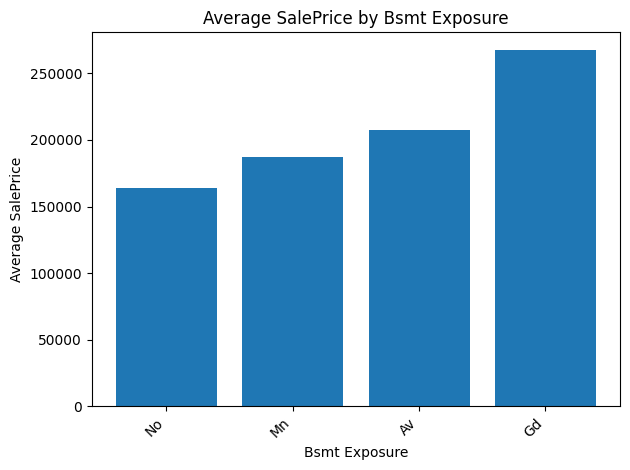

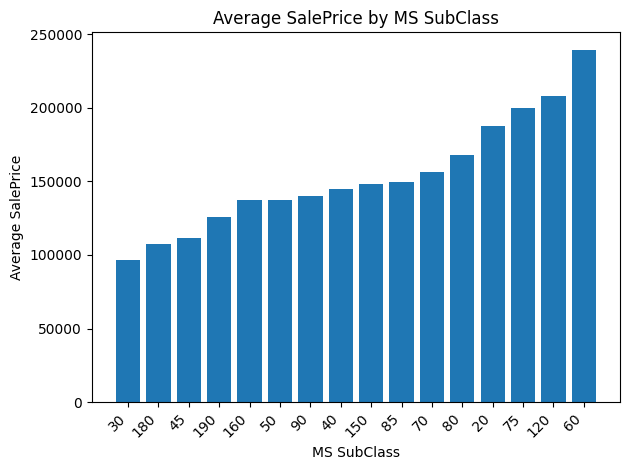

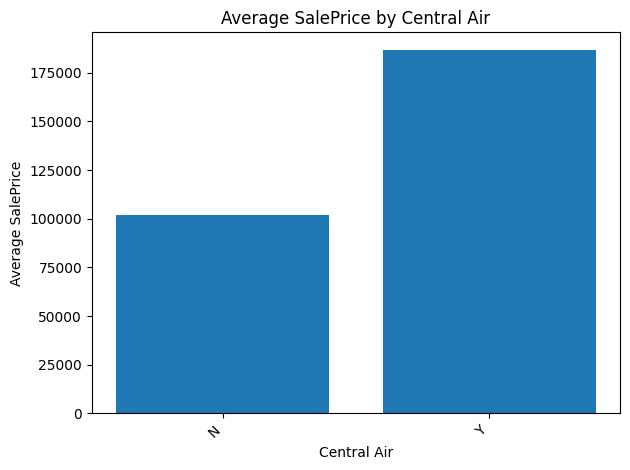

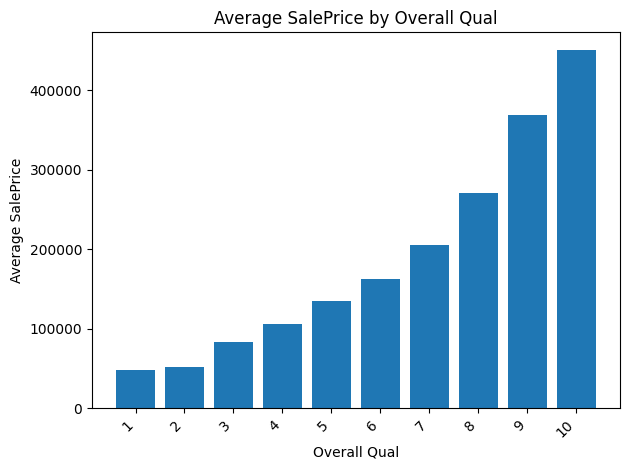

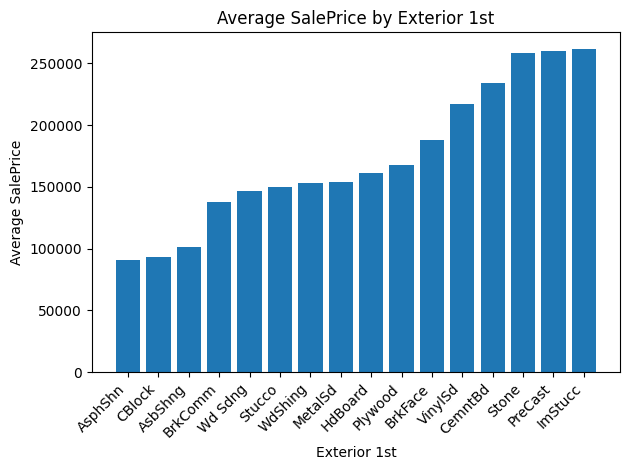

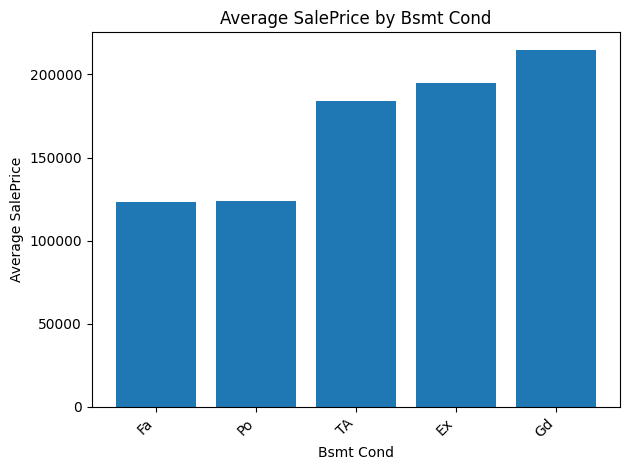

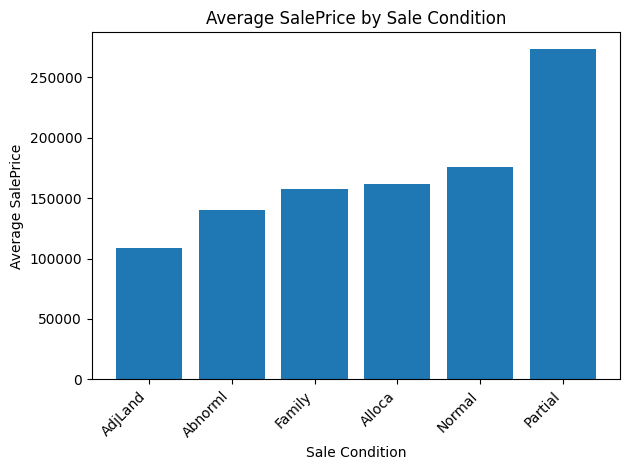

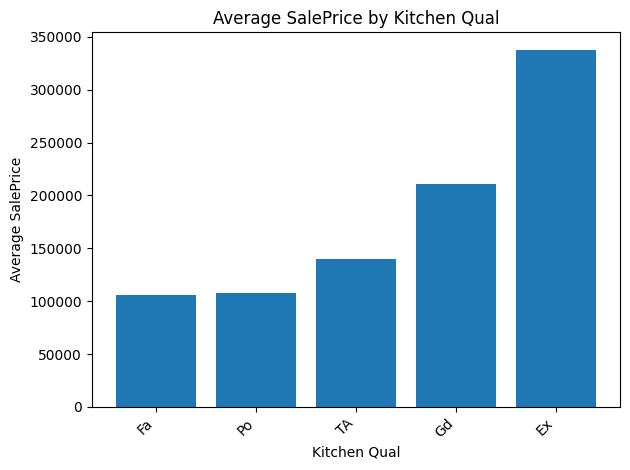

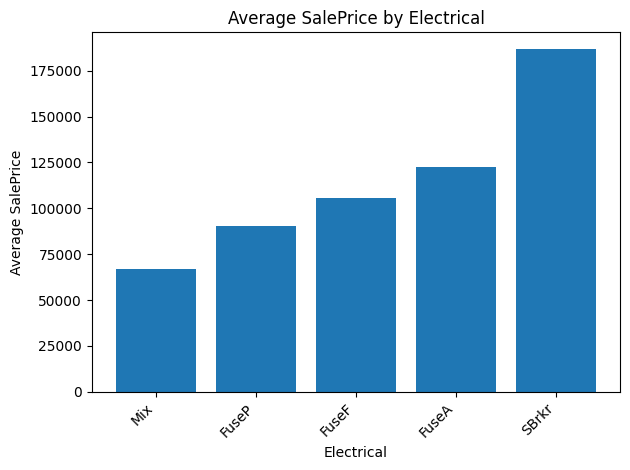

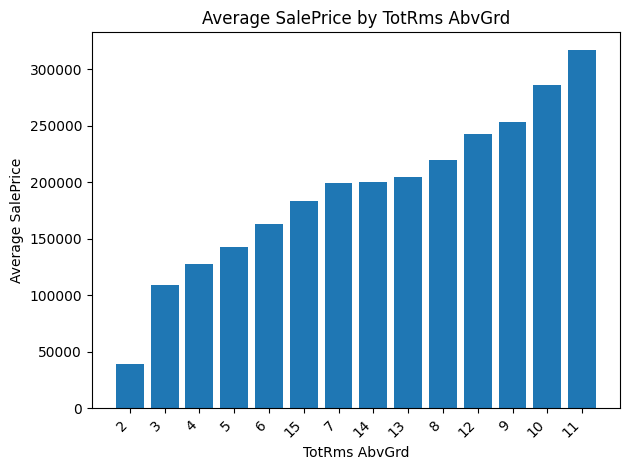

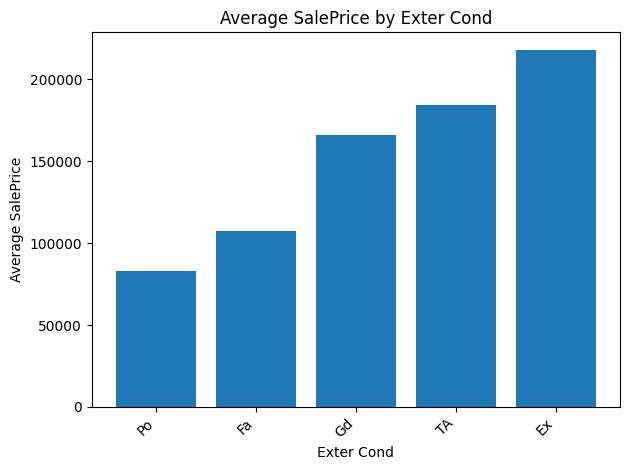

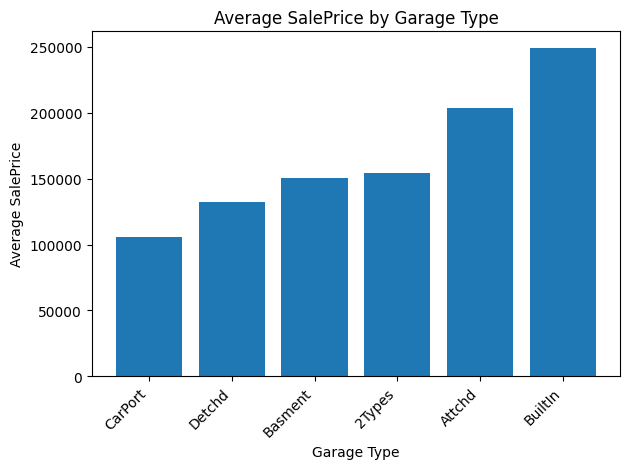

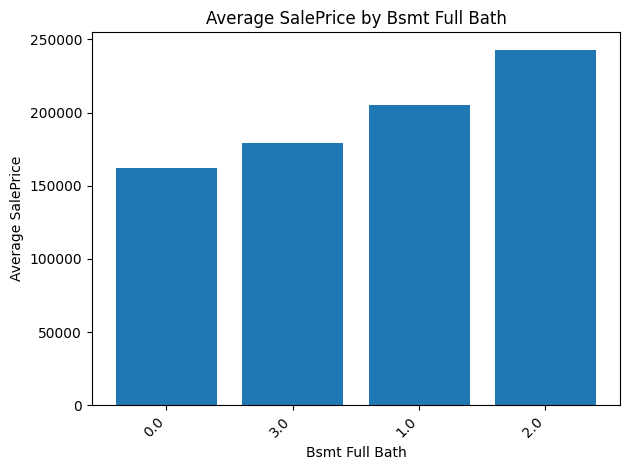

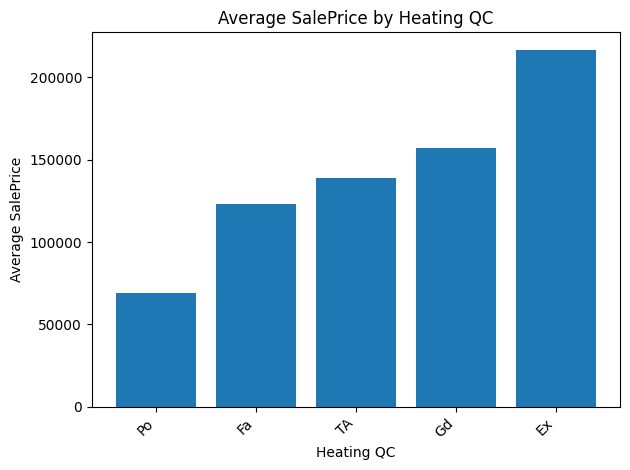

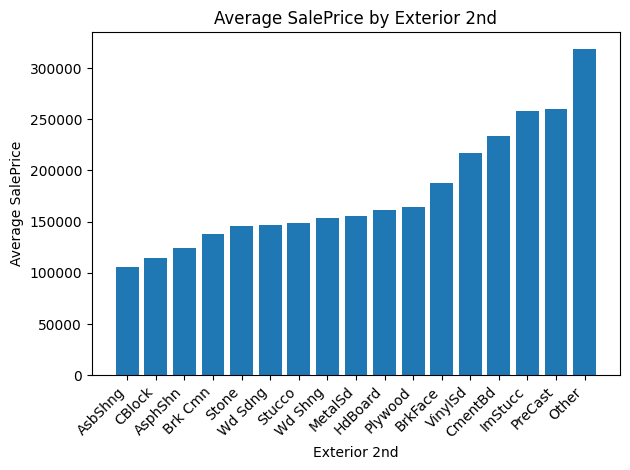

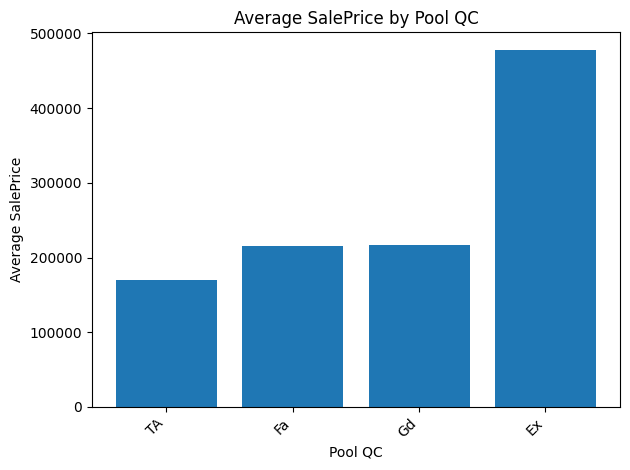

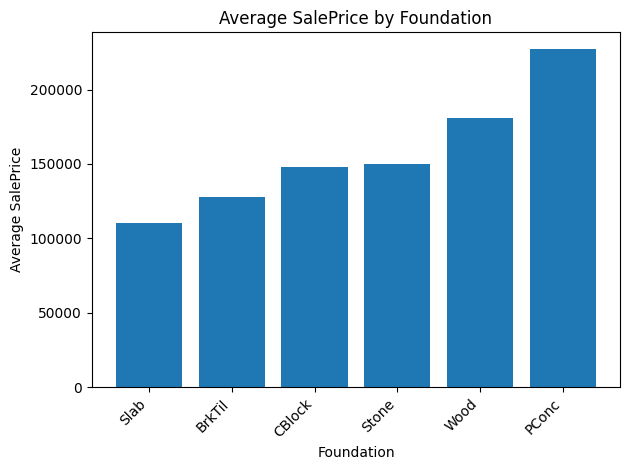

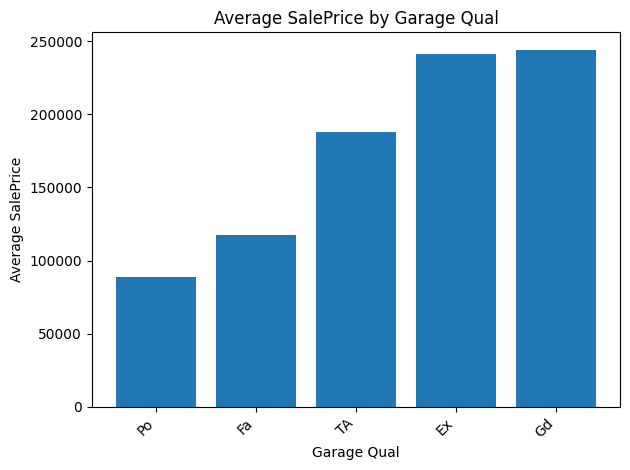

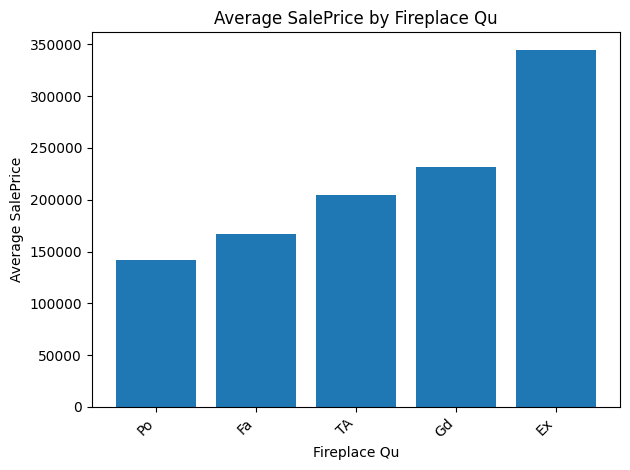

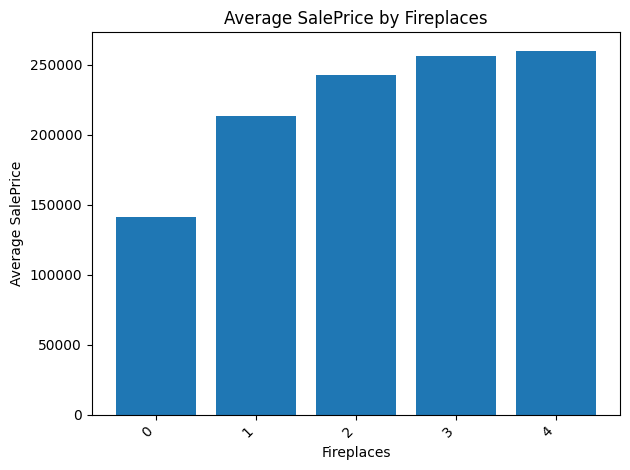

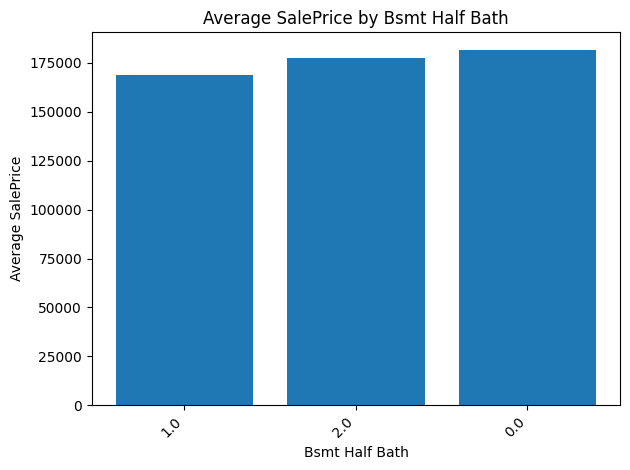

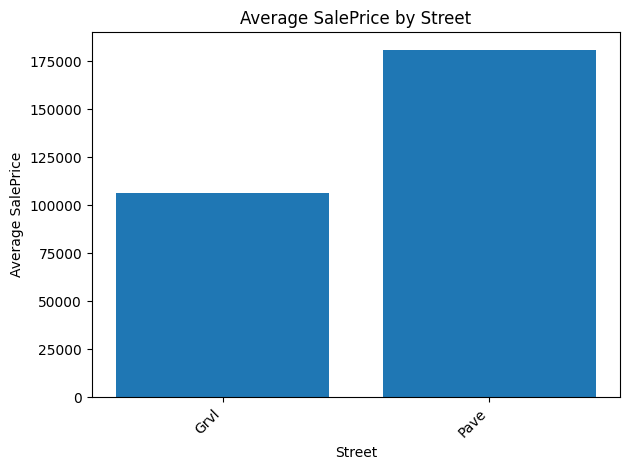

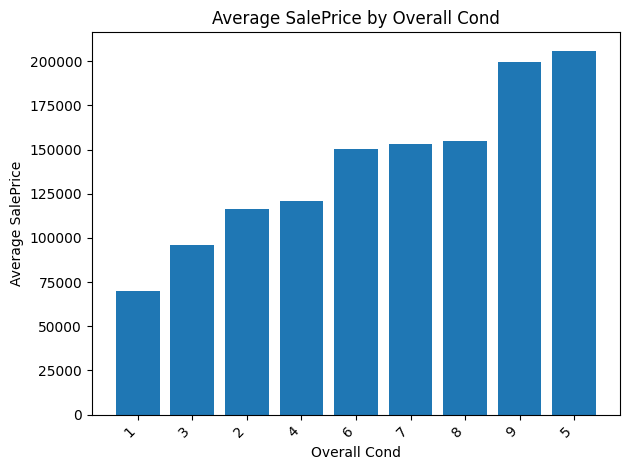

In [ ]:
nominal_columns = [
    "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Utilities", 
    "Lot Config", "Neighborhood", "Condition 1", "Condition 2", "Bldg Type", "House Style", 
    "Roof Style", "Roof Matl", "Exterior 1st", "Exterior 2nd", "Mas Vnr Type", "Foundation", 
    "Heating", "Central Air", "Electrical", "Garage Type", "Garage Finish", 
    "Garage Qual", "Garage Cond", "Paved Drive", "Pool QC", "Fence", "Misc Feature", 
    "Sale Type", "Sale Condition"
]

ordinal_columns = [
    "Lot Shape", "Land Slope", "Overall Qual", "Overall Cond", "Exter Qual", "Exter Cond", 
    "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2", 
    "Heating QC", "Kitchen Qual", "Functional", "Fireplace Qu"
]

discrete_columns = [
    "Bsmt Full Bath", "Bsmt Half Bath", "Full Bath", 
    "Half Bath", "Bedroom AbvGr", "Kitchen AbvGr", "TotRms AbvGrd",
    "Fireplaces", "Garage Cars", "Yr Sold"
]


categorical_columns = nominal_columns + ordinal_columns + discrete_columns
categorical_columns = set(categorical_columns)

for column in categorical_columns:
    average_price = df.groupby(column)['SalePrice'].mean().reset_index()
    average_price = average_price.sort_values(by='SalePrice', ascending=True)
    plt.bar(average_price[column].astype(str), average_price['SalePrice'])
    plt.xlabel(column)
    plt.ylabel('Average SalePrice')
    plt.title(f"Average SalePrice by {column}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


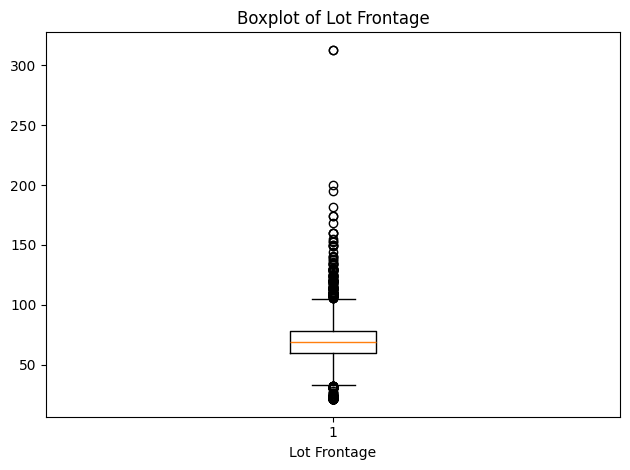

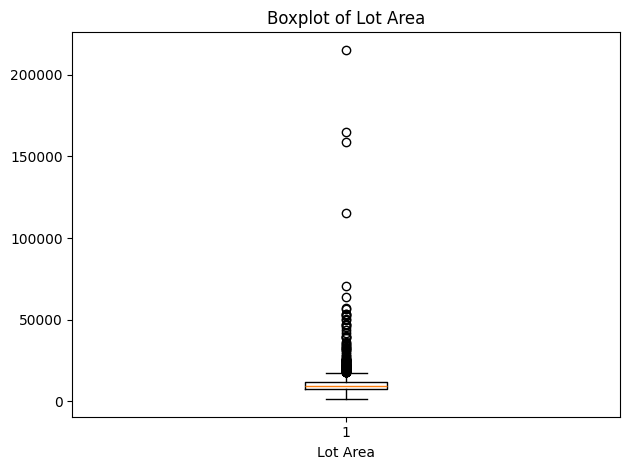

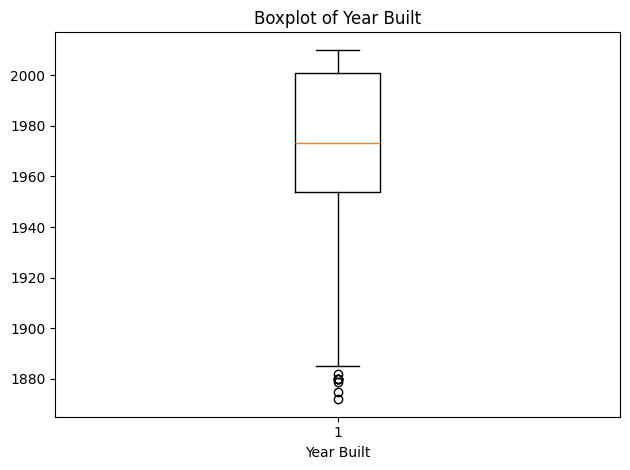

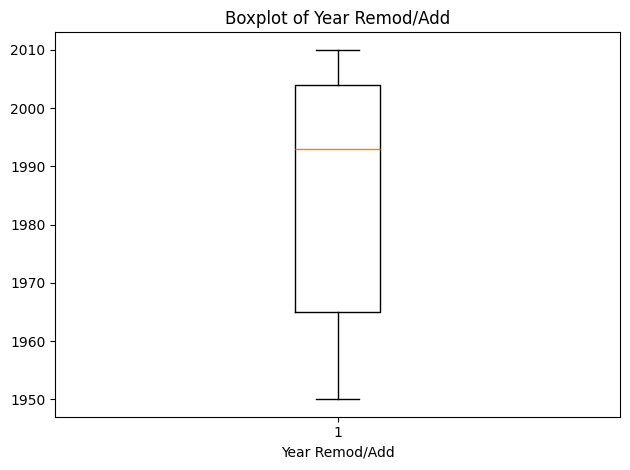

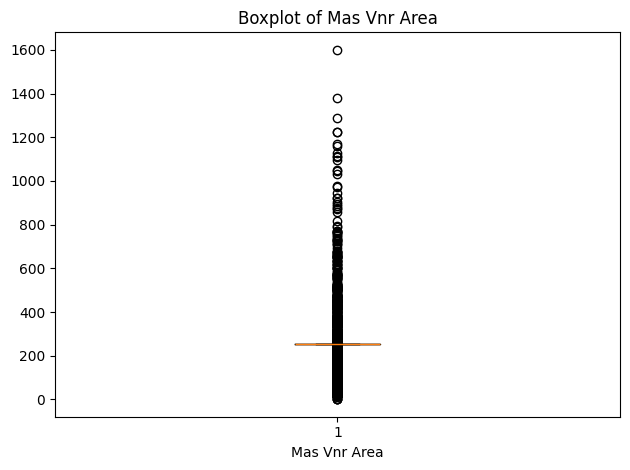

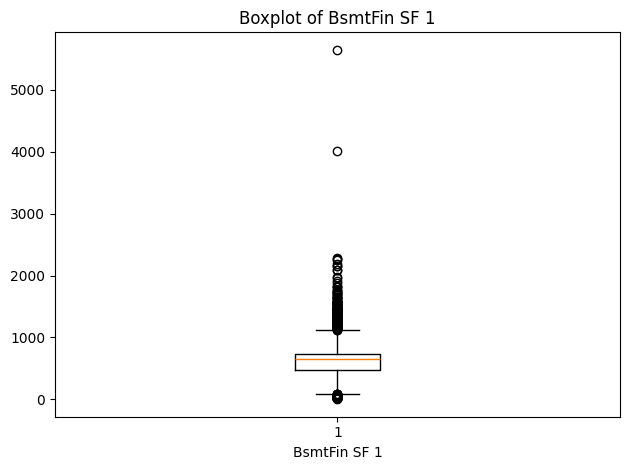

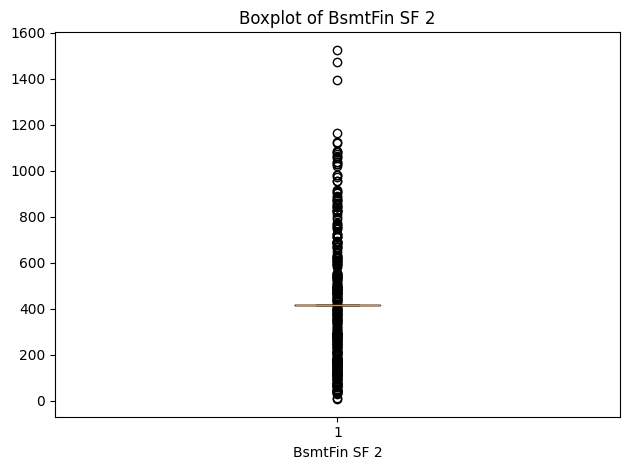

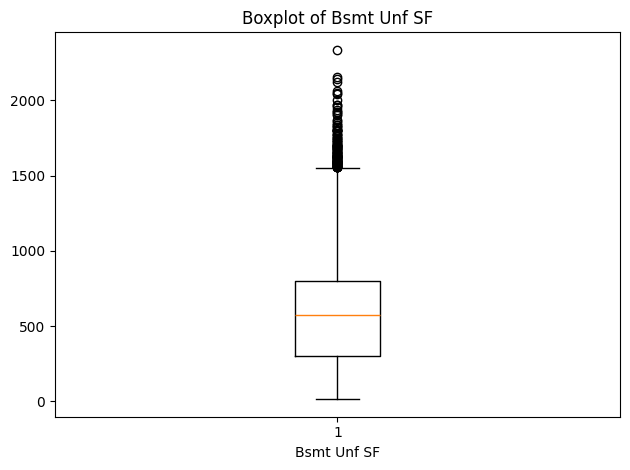

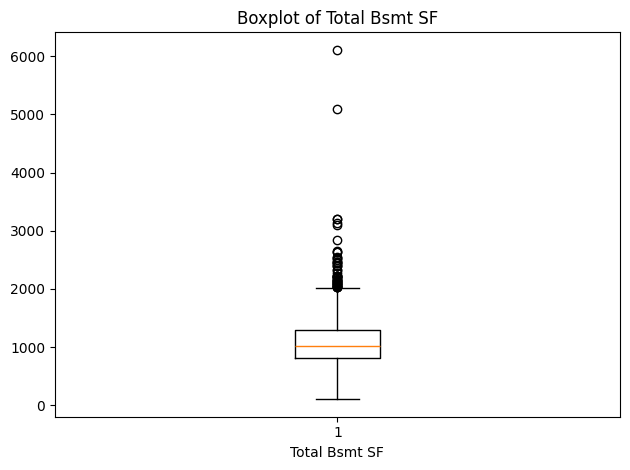

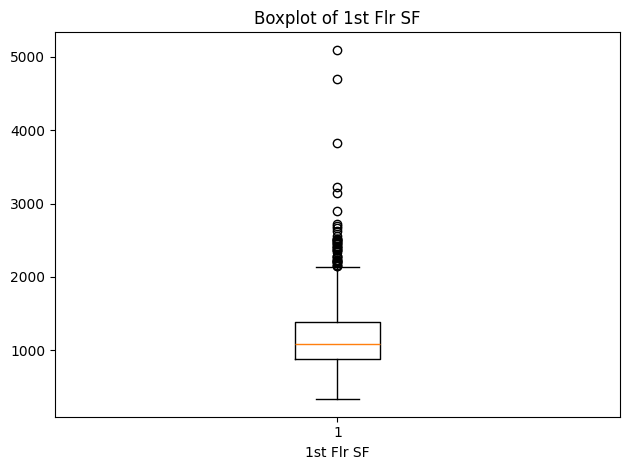

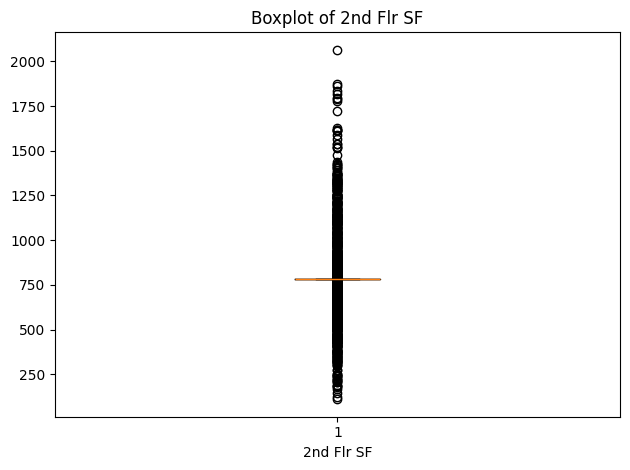

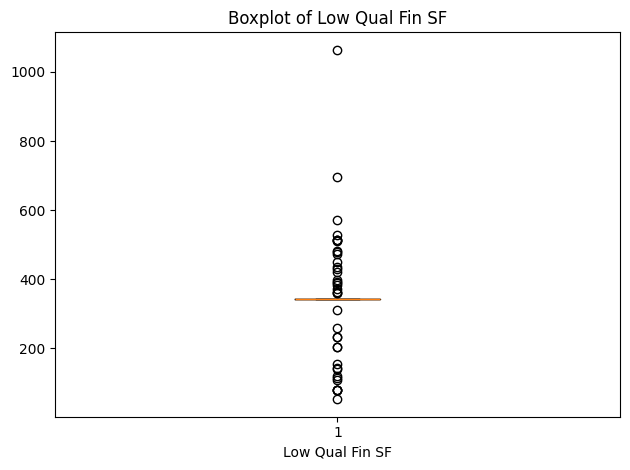

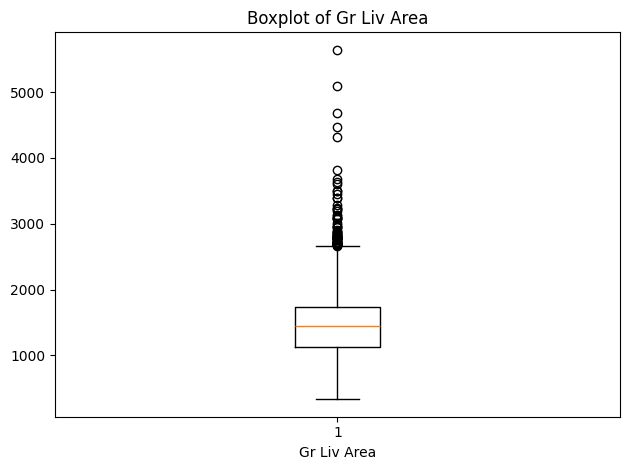

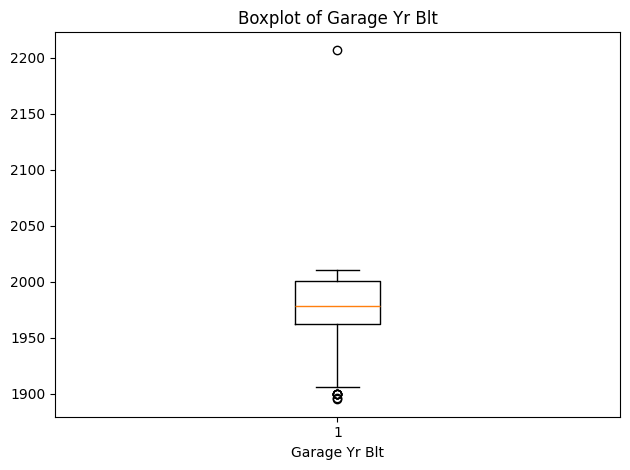

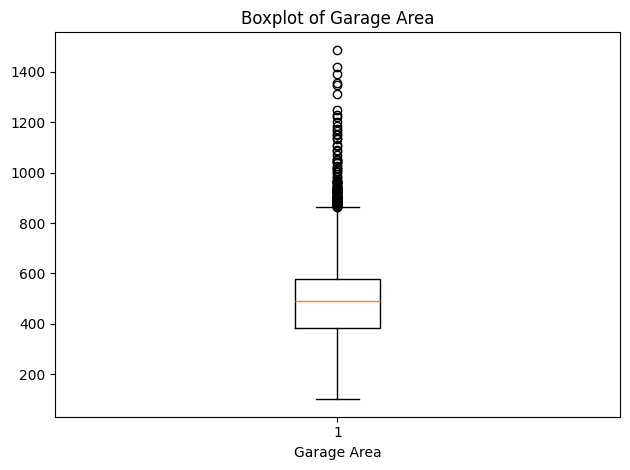

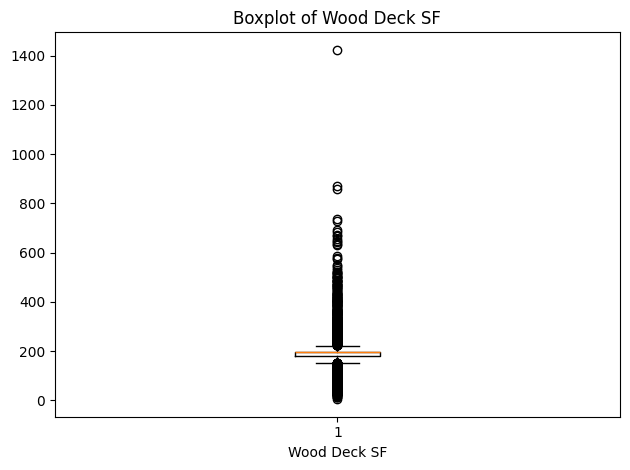

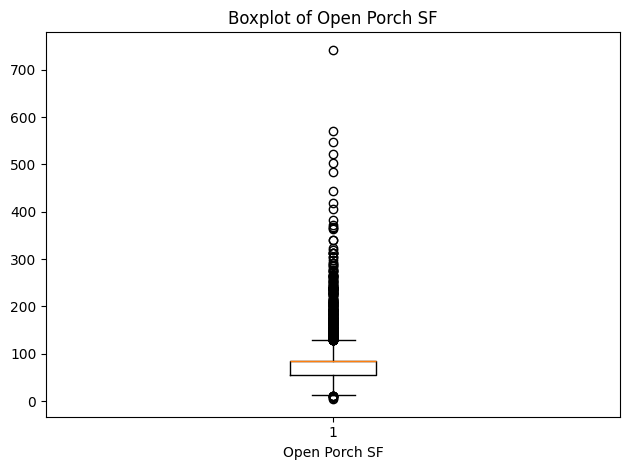

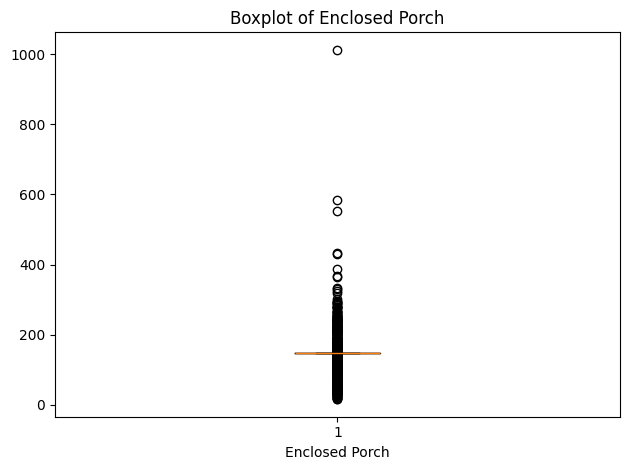

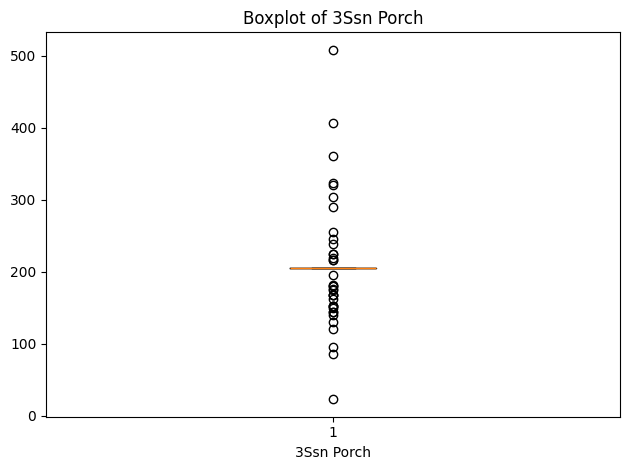

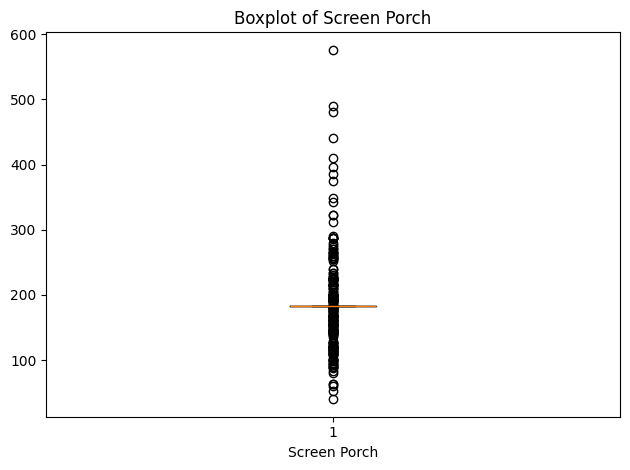

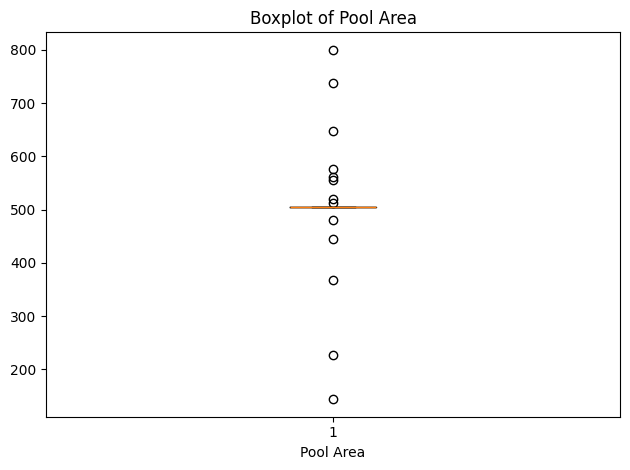

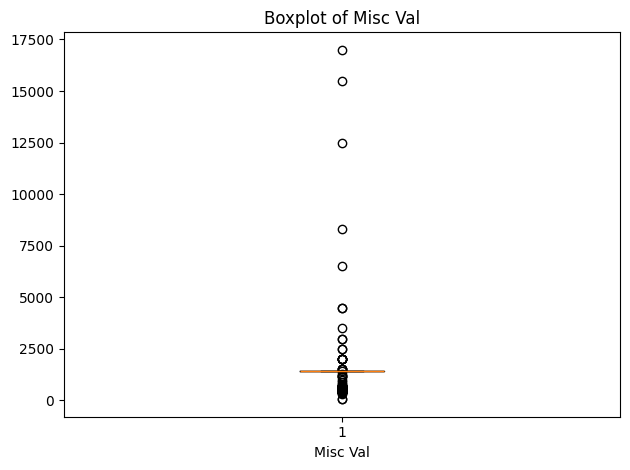

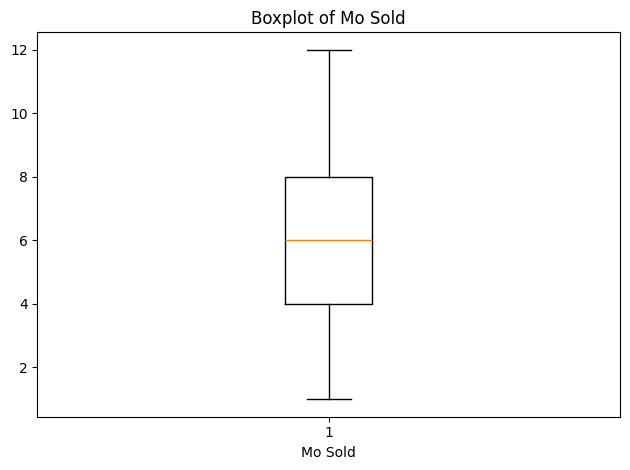

In [24]:
columns_to_exclude = categorical_columns.union({'Mon Sold','SalePrice', 'Order', 'PID'})
continous_columns = [col for col in df.columns if col not in categorical_columns and col not in columns_to_exclude]

for column in continous_columns:
    current_column = df[column].replace(0, np.nan)
    plt.boxplot(current_column.fillna(current_column.mean()))
    plt.xlabel(column)
    plt.title(f"Boxplot of {column}")
    plt.tight_layout()
    plt.show()

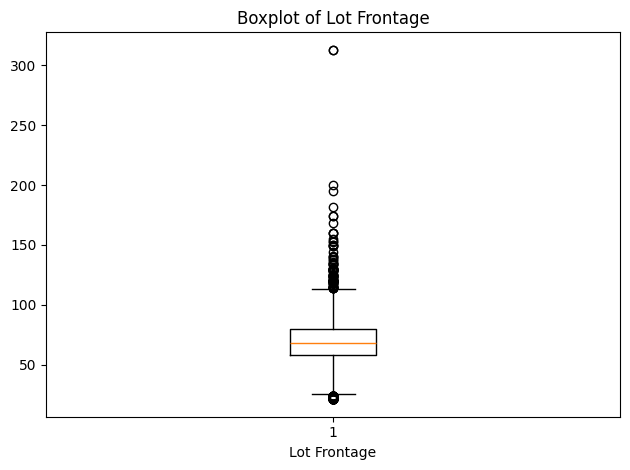

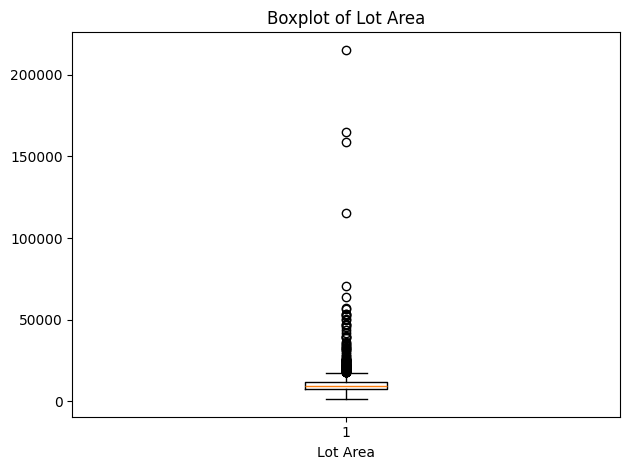

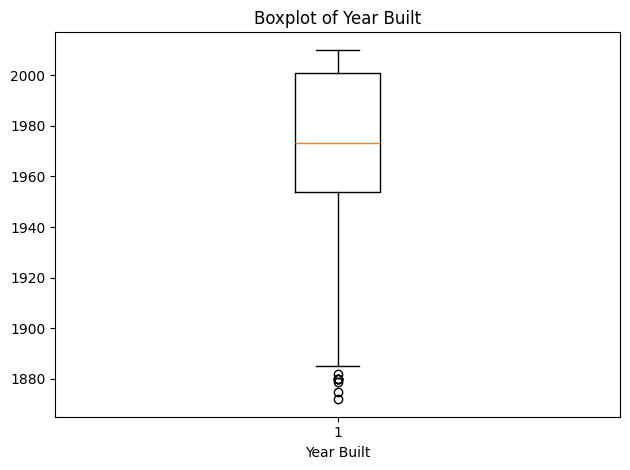

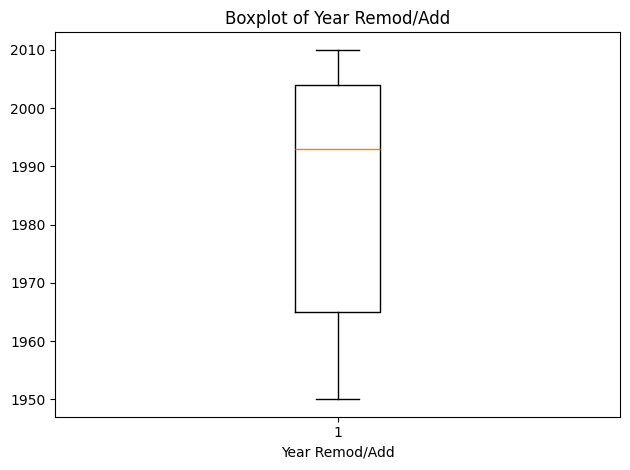

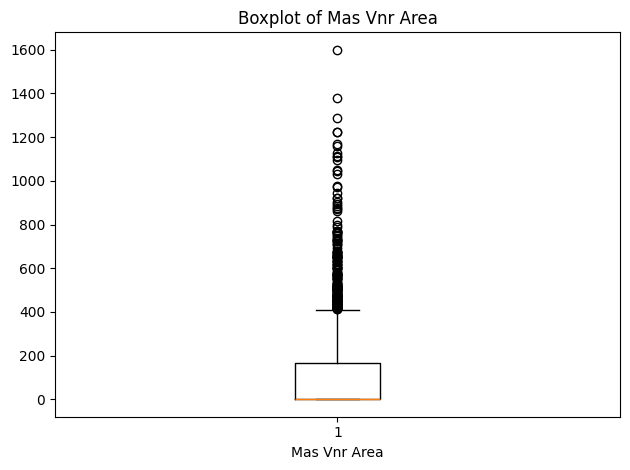

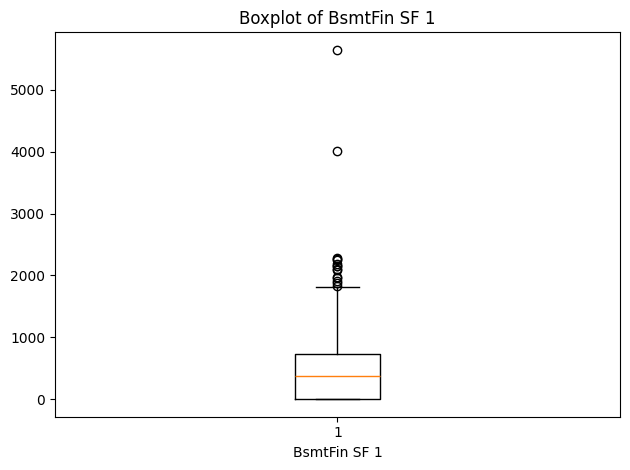

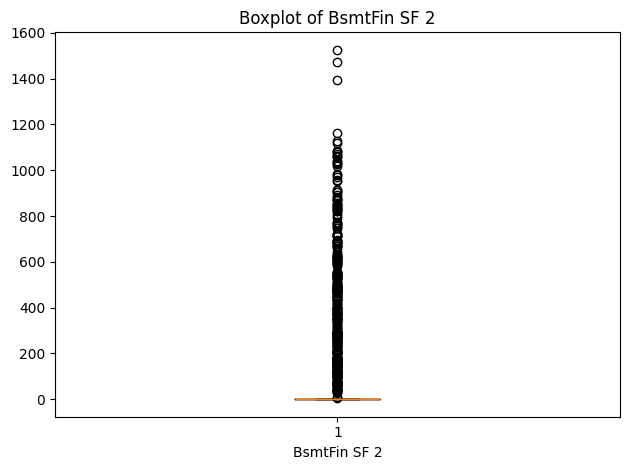

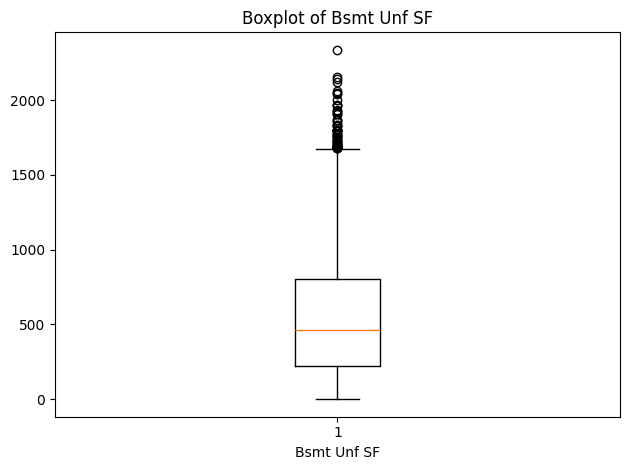

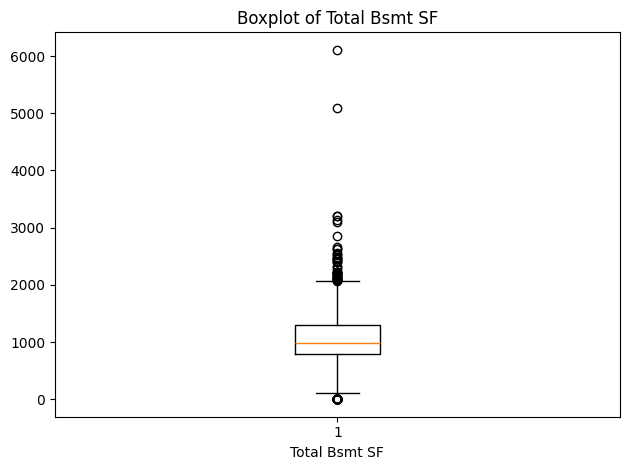

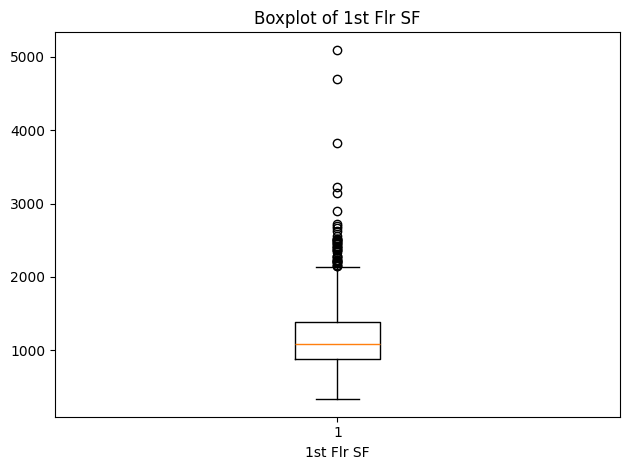

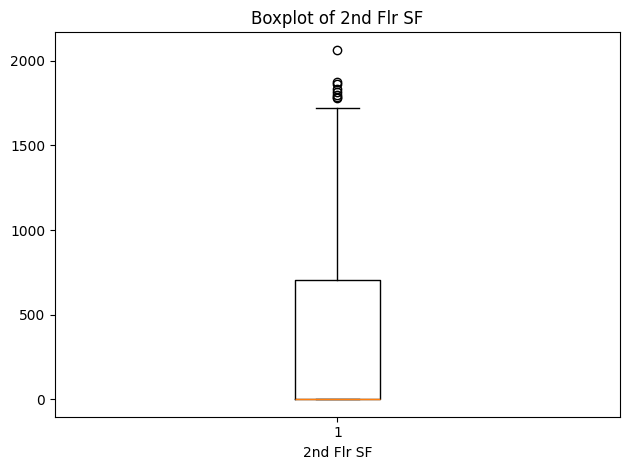

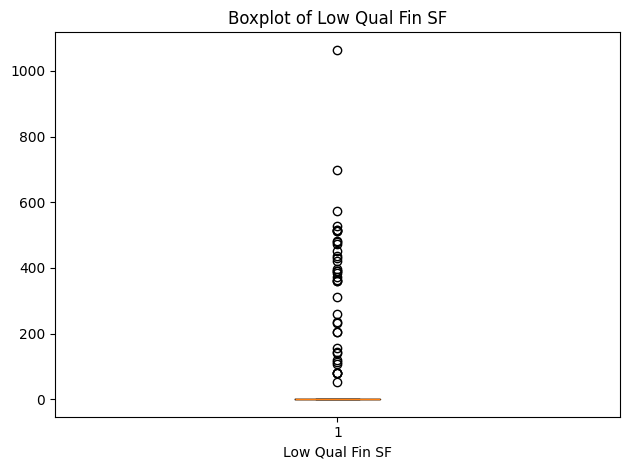

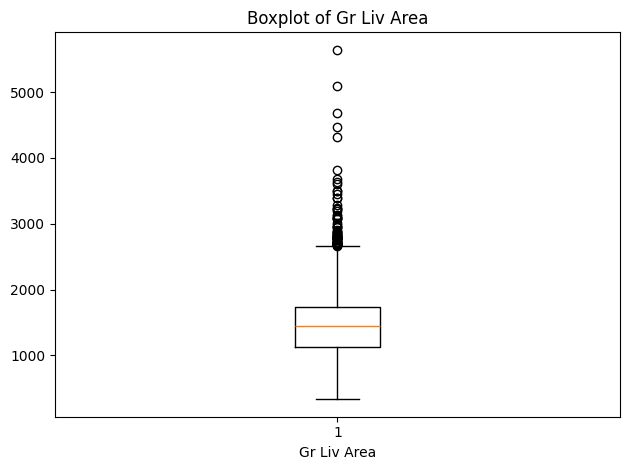

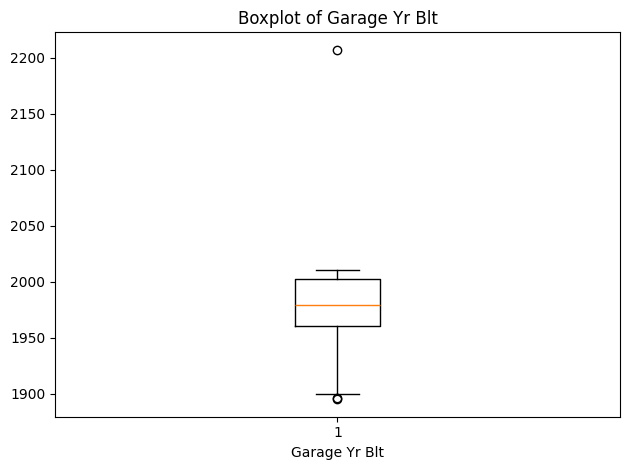

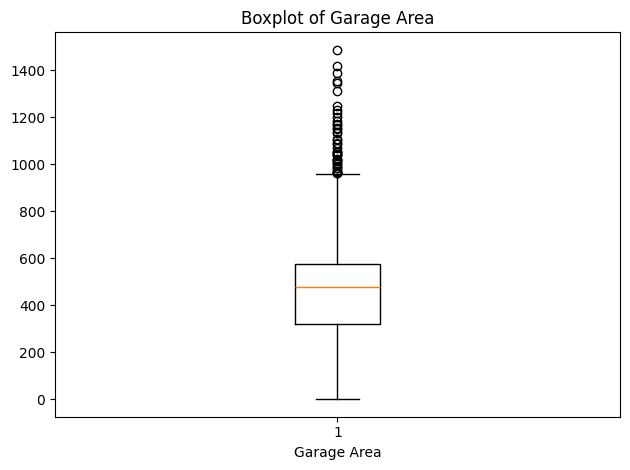

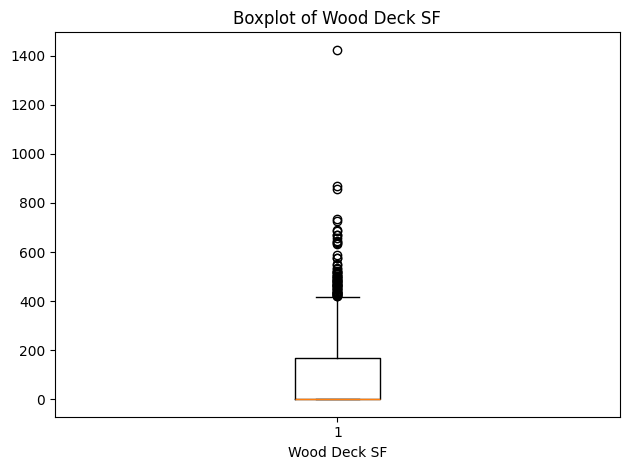

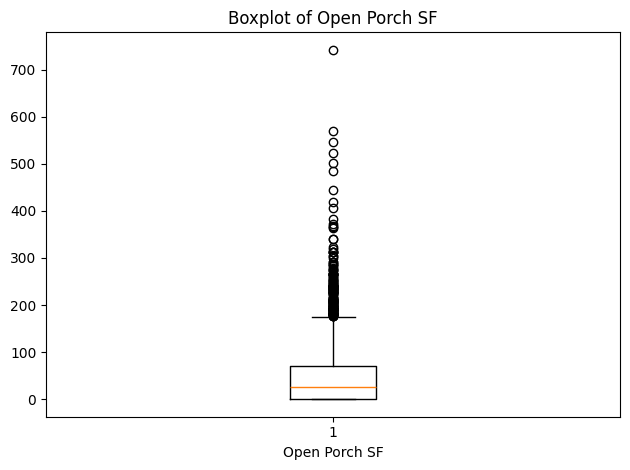

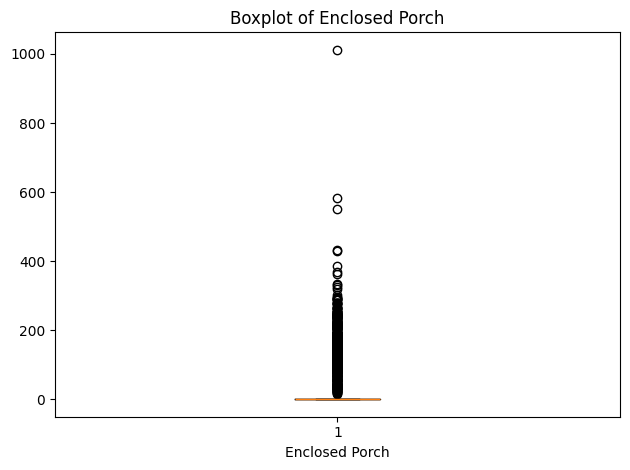

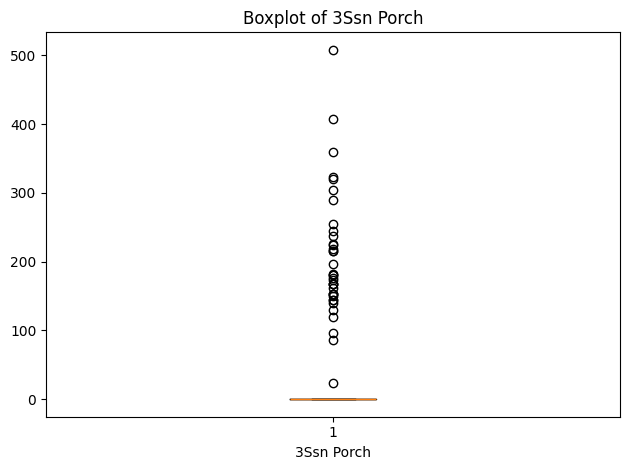

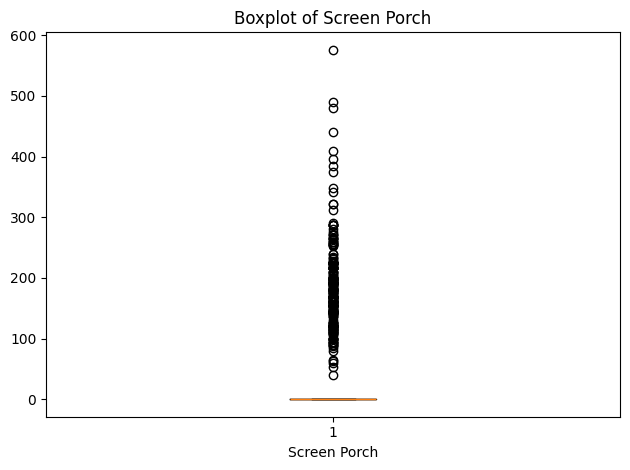

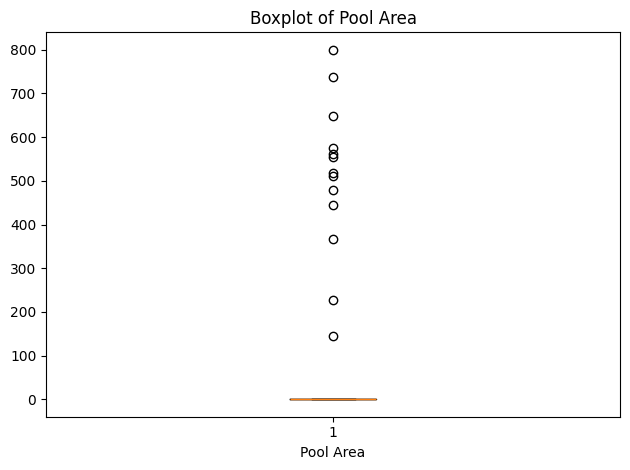

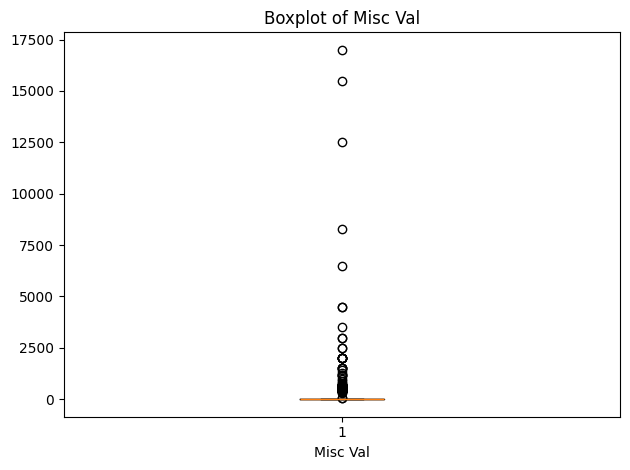

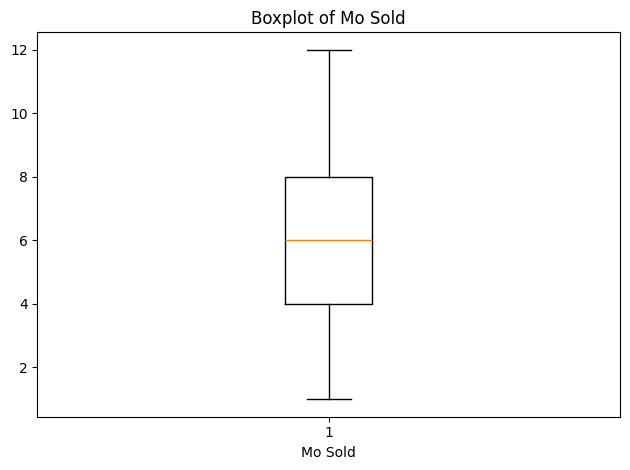

In [ ]:
columns_to_exclude = categorical_columns.union({'Mon Sold','SalePrice', 'Order', 'PID'})
continous_columns = [col for col in df.columns if col not in categorical_columns and col not in columns_to_exclude]

for column in continous_columns:
    plt.boxplot(x=df[column].dropna())
    plt.xlabel(column)
    plt.title(f"Boxplot of {column}")
    plt.tight_layout()
    plt.show()

Columns that have no use determining the price: Order, PID

To Do: Outlier, Checking null/na values, continous columns into categorical, validation?

For BoxPlots: check values of area and remove 0 as it messes with the averages

